In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orginal = pd.read_csv("../Datasets/pulsar_stars.csv")

In [3]:
df_orginal.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df_orginal.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [5]:
df_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


array([[<AxesSubplot:title={'center':' Mean of the integrated profile'}>,
        <AxesSubplot:title={'center':' Standard deviation of the integrated profile'}>,
        <AxesSubplot:title={'center':' Excess kurtosis of the integrated profile'}>],
       [<AxesSubplot:title={'center':' Skewness of the integrated profile'}>,
        <AxesSubplot:title={'center':' Mean of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Standard deviation of the DM-SNR curve'}>],
       [<AxesSubplot:title={'center':' Excess kurtosis of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Skewness of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':'target_class'}>]], dtype=object)

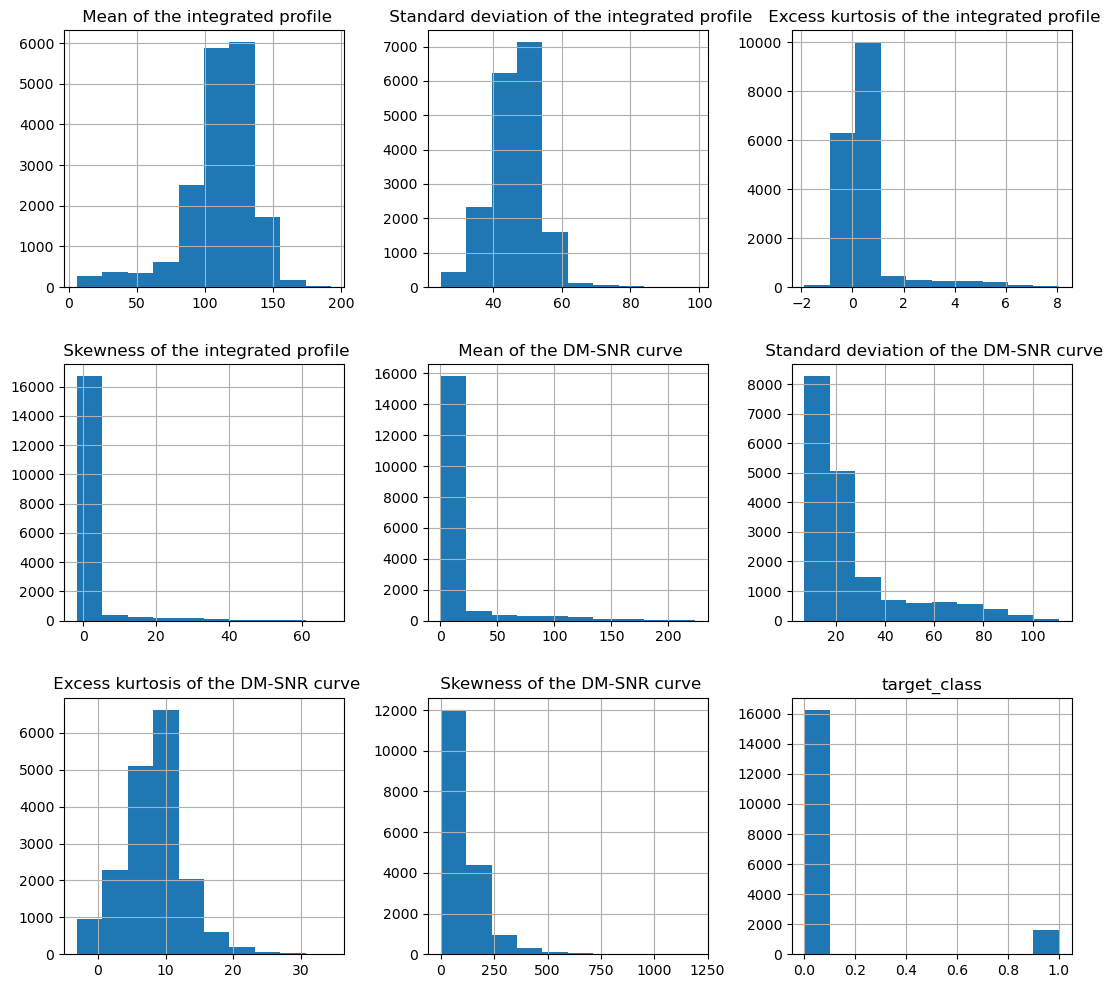

In [6]:
df_orginal.hist(figsize=(13, 12))

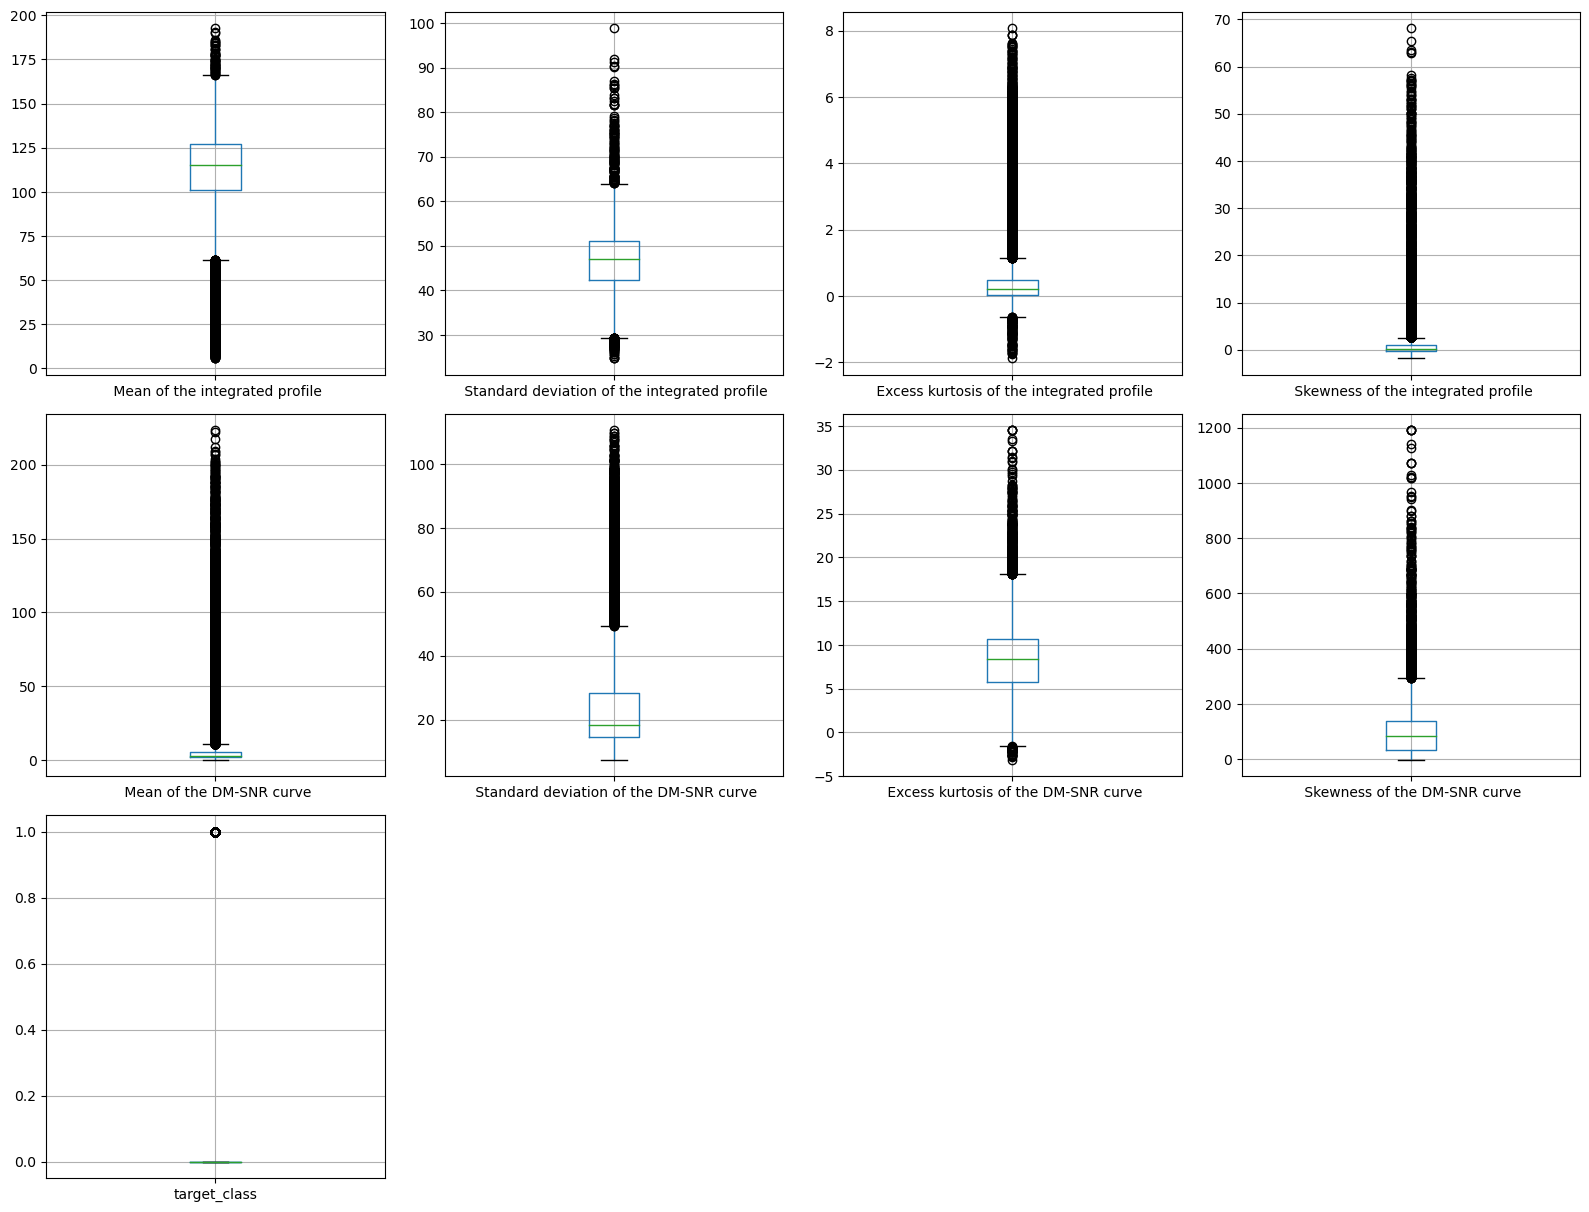

In [7]:
plt.figure(figsize=(16 , 16))
for i, col in enumerate(df_orginal.columns):
    plt.subplot(4, 4, i + 1)
    df_orginal.boxplot(col)
    plt.tight_layout()

In [8]:
df_orginal.target_class.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [9]:
!pip install imblearn

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


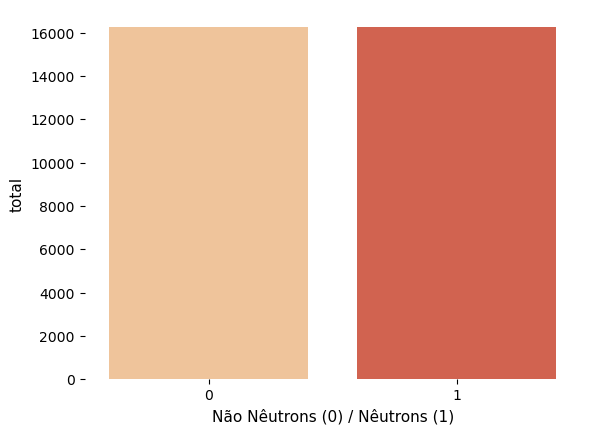

In [11]:
X = df_orginal.iloc[:, 0:8]
y = df_orginal.iloc[:, 8]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X, y = X_res, y_res


sns.countplot(y_res, palette='OrRd')
plt.box(False)
plt.xlabel("Não Nêutrons (0) / Nêutrons (1)", fontsize=11)
plt.ylabel("total", fontsize=11)
plt.show()

In [12]:
X["target_class"] = y
new_df = X

array([[<AxesSubplot:title={'center':' Mean of the integrated profile'}>,
        <AxesSubplot:title={'center':' Standard deviation of the integrated profile'}>,
        <AxesSubplot:title={'center':' Excess kurtosis of the integrated profile'}>],
       [<AxesSubplot:title={'center':' Skewness of the integrated profile'}>,
        <AxesSubplot:title={'center':' Mean of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Standard deviation of the DM-SNR curve'}>],
       [<AxesSubplot:title={'center':' Excess kurtosis of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Skewness of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':'target_class'}>]], dtype=object)

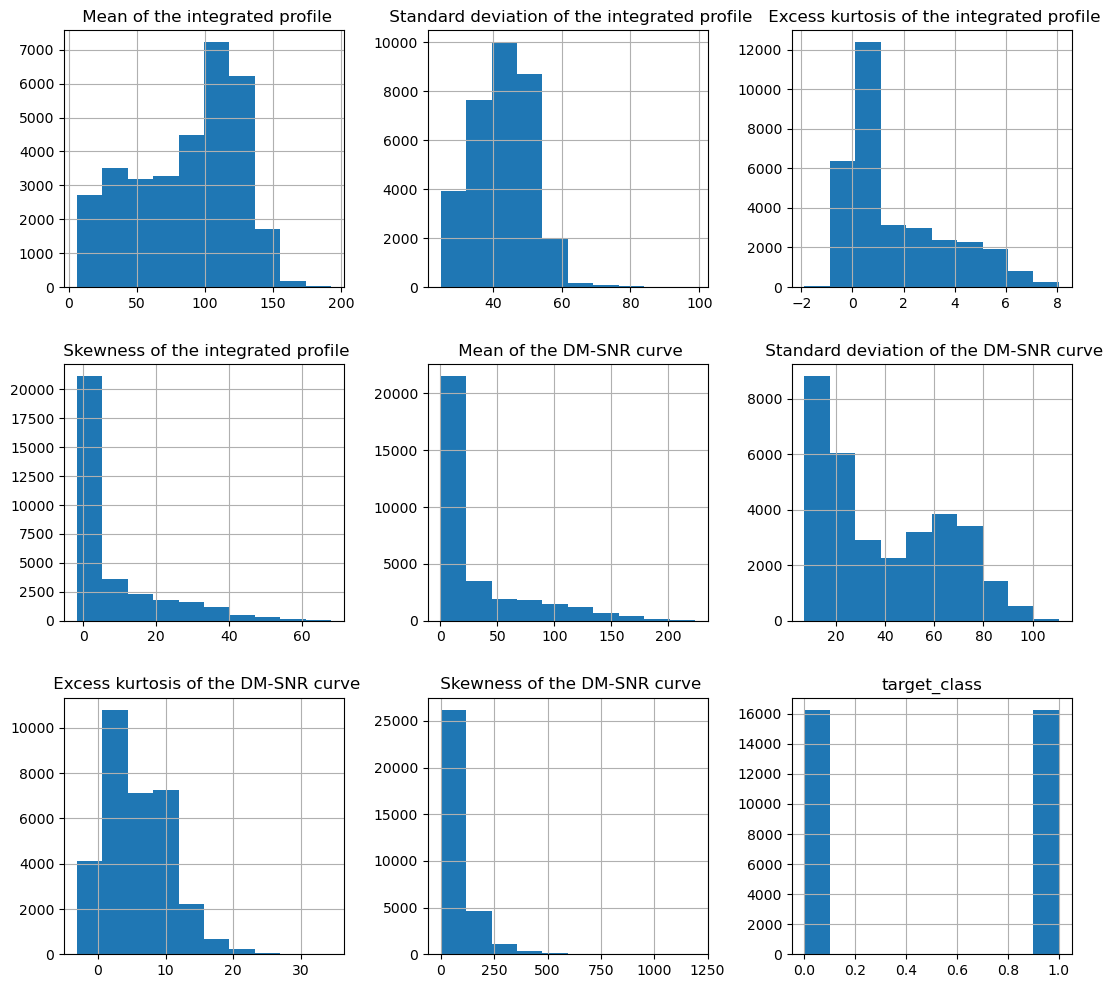

In [13]:
new_df.hist(figsize=(13, 12))

<AxesSubplot:>

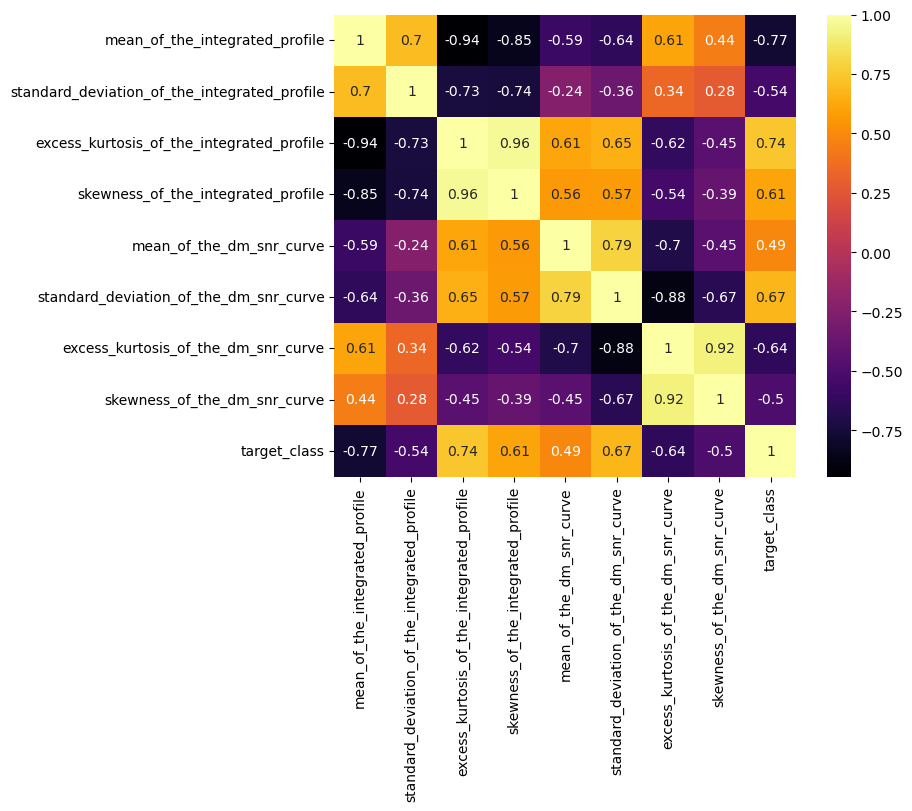

In [33]:
corr = new_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

In [15]:
new_df.columns = new_df.columns.str.lower()
new_df.columns = new_df.columns.str.strip()
new_df.columns = new_df.columns.str.replace(" ", "_")
new_df.columns = new_df.columns.str.replace("-", "_")

new_df.tail()

,mean_of_the_integrated_profile,standard_deviation_of_the_integrated_profile,excess_kurtosis_of_the_integrated_profile,skewness_of_the_integrated_profile,mean_of_the_dm_snr_curve,standard_deviation_of_the_dm_snr_curve,excess_kurtosis_of_the_dm_snr_curve,skewness_of_the_dm_snr_curve,target_class
32513,80.724215,47.016511,1.263814,1.952238,51.973251,74.436661,1.034664,-0.466165,1
32514,12.461454,31.646152,6.015552,37.422362,68.817311,67.020270,0.728766,-0.261396,1
32515,66.591870,45.773232,2.136535,5.341393,142.482255,87.654512,-0.503044,-1.153820,1
32516,70.089223,41.009980,1.586780,4.443027,7.053372,33.415808,5.233680,28.026362,1
32517,32.621707,44.527564,2.701349,7.414790,93.318780,78.831592,0.542167,-0.957096,1


<AxesSubplot:>

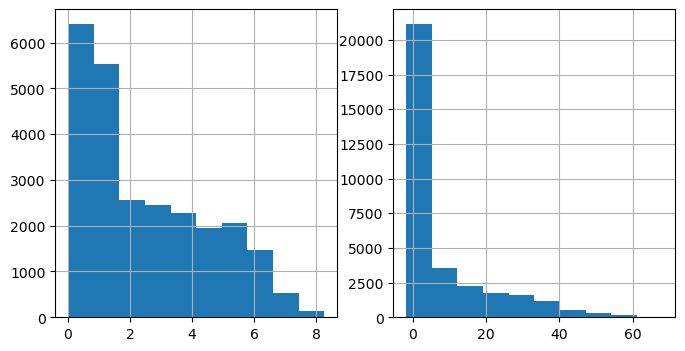

In [30]:
skewness_of_the_integrated_profile_sqrt = np.sqrt(new_df.skewness_of_the_integrated_profile)
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
skewness_of_the_integrated_profile_sqrt.hist()

plt.subplot(1, 2, 2)
new_df.skewness_of_the_integrated_profile.hist()

<AxesSubplot:>

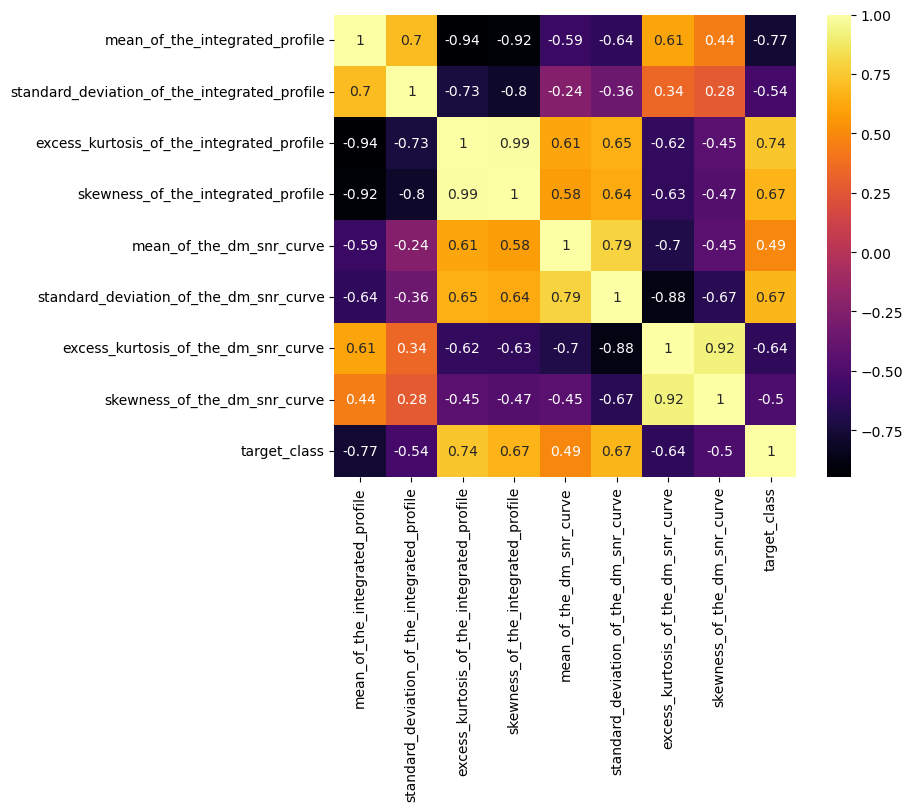

In [32]:
new_df_test = new_df.copy()
new_df_test.skewness_of_the_integrated_profile = skewness_of_the_integrated_profile_sqrt

corr = new_df_test.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')